# 📊 Análisis del Archivo: **THOR_KOREAN_DATA.csv**

El archivo contiene datos detallados de misiones durante la **Guerra de Corea**. A continuación, se explican las columnas principales y las estadísticas que se podrían calcular.

---

## 📝 **Descripción de las columnas principales**
1. **`KOREAN_ID`**: Identificador único para cada misión.
2. **`MSN_DATE`**: 📅 Fecha de la misión.
3. **`UNIT_ID` / `UNIT_ID_2`**: 🔢 Identificación de la unidad involucrada.
4. **`GROUP_OR_HIGHER_UNIT_ID`**: 🛡️ Grupo o unidad de mayor nivel al que pertenece.
5. **`SQUADRON_ID`**: ✈️ Escuadrón específico involucrado en la misión.
6. **`AIRFIELD_ID`**: 🛫 Identificador del aeródromo utilizado.
7. **`LAUNCH_BASE`**: 🏢 Base de lanzamiento de la misión.
8. **`LAUNCH_COUNTRY`**: 🌍 País desde donde se lanzó la misión.
9. **`AC_TYPE`**: 🚀 Tipo de aeronave utilizada.
10. **`AC_DISPATCHED`**: 📦 Número de aeronaves enviadas.
11. **`AC_EFFECTIVE`**: ✅ Número de aeronaves que cumplieron efectivamente la misión.
12. **`AC_ABORT`**: ❌ Número de misiones abortadas.
13. **`AC_LOST_TO_EAC` / `AAA` / `OTHER`**: ⚠️ Pérdidas de aeronaves por diferentes causas (e.g., fuego enemigo, antiaéreo, etc.).
14. **`AC_DAMAGED`**: 💥 Número de aeronaves dañadas.
15. **`KIA` / `WIA` / `MIA`**: 🧍‍♂️ **Bajas humanas**: muertos en acción (KIA), heridos (WIA) y desaparecidos (MIA).
16. **`TOTAL_TONS`**: 💣 Cantidad total de bombas lanzadas (en toneladas).
17. **`ROCKETS`**: 🚀 Cantidad de cohetes disparados.
18. **`BULLETS`**: 🔫 Cantidad de balas disparadas.

---

## 📈 **Estadísticas recomendadas**
### ✈️ **Misiones y aeronaves**
1. **Número total de misiones**:
   - Contar el número total de registros (`len(data)`).
2. **Número total de aeronaves enviadas, efectivas y abortadas**:
   - Sumar las columnas `AC_DISPATCHED`, `AC_EFFECTIVE`, y `AC_ABORT`.
3. **Pérdidas de aeronaves por causa**:
   - Sumar `AC_LOST_TO_EAC`, `AC_LOST_TO_AAA`, y `AC_LOST_TO_OTHER`.

---

### 🏢 **Base y país de lanzamiento**
4. **Frecuencia de uso de bases y países**:
   - Contar los valores únicos y sus frecuencias en `LAUNCH_BASE` y `LAUNCH_COUNTRY` con `value_counts()`.

---

### 🧍‍♂️ **Bajas humanas**
5. **Distribución de bajas (KIA, WIA, MIA)**:
   - Sumar cada columna para obtener el total.
   - Promedio de bajas por misión.

---

### 💣 **Armamento utilizado**
6. **Total de bombas, cohetes y balas lanzadas**:
   - Sumar `TOTAL_TONS`, `ROCKETS`, y `BULLETS`.
7. **Promedio de armamento por misión**:
   - Calcular el promedio por registro.

---

### 📅 **Temporalidad**
8. **Misiones por año/mes**:
   - Convertir `MSN_DATE` a un formato de fecha y agrupar por año/mes para contar.

---

### 🚀 **Tipo de aeronave**
9. **Frecuencia de tipos de aeronaves**:
   - Contar los valores únicos en `AC_TYPE`.

---


# IMPORTAR LIBRERIAS

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import folium
from folium.plugins import HeatMap
#from googletrans import Translator
import re
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#
___

# LECTURA BASE DE DATOS

In [4]:
file_path2 = './data/THOR_KOREAN_DATA.csv'
df_bombardeos_2 = pd.read_csv(file_path2, sep=',')
df_bombardeos_2.head() 

,KOREAN_ID,MSN_DATE,UNIT_ID,UNIT_ID_2,UNIT_ID_CODE,GROUP_OR_HIGHER_UNIT_ID,SQUADRON_ID,AIRFIELD_ID,LAUNCH_BASE,LAUNCH_COUNTRY,...,AC_LOST_TO_OTHER,AC_DAMAGED,KIA,WIA,MIA,EAC_CONFIRMED_DESTROYED,EAC_PROB_DESTROYED,TOTAL_TONS,ROCKETS,BULLETS
0,1,2/1/51,003BL,008BL,003BL008BL,NaN,3rd Bombardment Group (Light),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,10.0,74.0
1,2,6/28/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,28.0,NaN,132.0
2,3,6/28/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,28.0,NaN,132.0
3,4,6/29/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,24.0,NaN,113.0
4,5,6/29/50,003BL,NaN,003BL,3rd Bombardment Group (Light),NaN,G841,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,24.0,NaN,113.0


In [5]:
df_bombardeos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12878 entries, 0 to 12877
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KOREAN_ID                12878 non-null  int64  
 1   MSN_DATE                 12878 non-null  object 
 2   UNIT_ID                  12822 non-null  object 
 3   UNIT_ID_2                12847 non-null  object 
 4   UNIT_ID_CODE             12875 non-null  object 
 5   GROUP_OR_HIGHER_UNIT_ID  2992 non-null   object 
 6   SQUADRON_ID              5088 non-null   object 
 7   AIRFIELD_ID              12870 non-null  object 
 8   LAUNCH_BASE              2098 non-null   object 
 9   LAUNCH_COUNTRY           2098 non-null   object 
 10  LAUNCH_LAT               0 non-null      float64
 11  LAUNCH_LONG              0 non-null      float64
 12  AC_TYPE                  12877 non-null  object 
 13  AC_DISPATCHED            12869 non-null  float64
 14  AC_EFFECTIVE          

In [9]:
estadisticas_ubicacion = df_bombardeos_2["LAUNCH_COUNTRY"].value_counts()
estadisticas_ubicacion

LAUNCH_COUNTRY
Okinawa        1137
Japan           912
Philippines      49
Name: count, dtype: int64

In [10]:
estadisticas_base_militar = df_bombardeos_2["LAUNCH_BASE"].value_counts()
estadisticas_base_militar

LAUNCH_BASE
Kadena AFB    1137
Yokota AFB     912
Clark AFB       49
Name: count, dtype: int64

In [12]:
total_misiones = len(df_bombardeos_2)
print(f"Número total de misiones: {total_misiones}")

Número total de misiones: 12878


In [13]:
total_ac_dispatched = df_bombardeos_2['AC_DISPATCHED'].sum()
total_ac_effective = df_bombardeos_2['AC_EFFECTIVE'].sum()
total_ac_abort = df_bombardeos_2['AC_ABORT'].sum()

print(f"Total de aeronaves enviadas: {total_ac_dispatched}")
print(f"Total de aeronaves efectivas: {total_ac_effective}")
print(f"Total de aeronaves abortadas: {total_ac_abort}")

Total de aeronaves enviadas: 185368.0
Total de aeronaves efectivas: 180507.0
Total de aeronaves abortadas: 5004.0


In [11]:
perdidas_eac = df_bombardeos_2['AC_LOST_TO_EAC'].sum()
perdidas_aaa = df_bombardeos_2['AC_LOST_TO_AAA'].sum()
perdidas_unknown_ea = df_bombardeos_2['AC_LOST_TO_UNKNOWN_EA'].sum()
perdidas_other = df_bombardeos_2['AC_LOST_TO_OTHER'].sum()

perdidas_total = perdidas_eac + perdidas_aaa + perdidas_unknown_ea + perdidas_other

print(f"Pérdidas de aeronaves por fuego enemigo (EAC): {perdidas_eac}")
print(f"Pérdidas de aeronaves por fuego antiaéreo (AAA): {perdidas_aaa}")
print(f"Pérdidas de aeronaves por causas desconocidas (UNKNOWN_EA): {perdidas_unknown_ea}")
print(f"Pérdidas de aeronaves por otras causas: {perdidas_other}")
print(f"Pérdidas totales de aeronaves: {perdidas_total}")

Pérdidas de aeronaves por fuego enemigo (EAC): 25.0
Pérdidas de aeronaves por fuego antiaéreo (AAA): 158.0
Pérdidas de aeronaves por causas desconocidas (UNKNOWN_EA): 106.0
Pérdidas de aeronaves por otras causas: 173.0
Pérdidas totales de aeronaves: 462.0


In [14]:
# Frecuencia de uso de bases
frecuencia_bases = df_bombardeos_2['LAUNCH_BASE'].value_counts()
print("Frecuencia de uso de bases:")
print(frecuencia_bases)

# Frecuencia de uso de países
frecuencia_paises = df_bombardeos_2['LAUNCH_COUNTRY'].value_counts()
print("\nFrecuencia de uso de países:")
print(frecuencia_paises)

Frecuencia de uso de bases:
LAUNCH_BASE
Kadena AFB    1137
Yokota AFB     912
Clark AFB       49
Name: count, dtype: int64

Frecuencia de uso de países:
LAUNCH_COUNTRY
Okinawa        1137
Japan           912
Philippines      49
Name: count, dtype: int64


In [15]:
base_pais = df_bombardeos_2.groupby(['LAUNCH_BASE', 'LAUNCH_COUNTRY']).size().reset_index(name='counts')
print(base_pais)

  LAUNCH_BASE LAUNCH_COUNTRY  counts
0   Clark AFB    Philippines      49
1  Kadena AFB        Okinawa    1137
2  Yokota AFB          Japan     912


In [16]:
# Sumar cada columna para obtener el total
total_kia = df_bombardeos_2['KIA'].sum()
total_wia = df_bombardeos_2['WIA'].sum()
total_mia = df_bombardeos_2['MIA'].sum()

print(f"Total de KIA (muertos en acción): {total_kia}")
print(f"Total de WIA (heridos en acción): {total_wia}")
print(f"Total de MIA (desaparecidos en acción): {total_mia}")

# Promedio de bajas por misión
promedio_kia = total_kia / total_misiones
promedio_wia = total_wia / total_misiones
promedio_mia = total_mia / total_misiones

print(f"Promedio de KIA por misión: {promedio_kia}")
print(f"Promedio de WIA por misión: {promedio_wia}")
print(f"Promedio de MIA por misión: {promedio_mia}")

Total de KIA (muertos en acción): 116.0
Total de WIA (heridos en acción): 127.0
Total de MIA (desaparecidos en acción): 404.0
Promedio de KIA por misión: 0.009007609877310141
Promedio de WIA por misión: 0.009861779779468862
Promedio de MIA por misión: 0.03137133095201118


In [18]:
# Agrupar por país y base, y calcular las sumas y promedios de KIA, WIA y MIA
estadisticas_pais_base = df_bombardeos_2.groupby(['LAUNCH_COUNTRY', 'LAUNCH_BASE']).agg(
    total_kia=('KIA', 'sum'),
    total_wia=('WIA', 'sum'),
    total_mia=('MIA', 'sum'),
    promedio_kia=('KIA', lambda x: x.sum() / total_misiones),
    promedio_wia=('WIA', lambda x: x.sum() / total_misiones),
    promedio_mia=('MIA', lambda x: x.sum() / total_misiones)
).reset_index()

estadisticas_pais_base

,LAUNCH_COUNTRY,LAUNCH_BASE,total_kia,total_wia,total_mia,promedio_kia,promedio_wia,promedio_mia
0,Japan,Yokota AFB,6.0,4.0,21.0,0.000466,0.000311,0.001631
1,Okinawa,Kadena AFB,20.0,45.0,68.0,0.001553,0.003494,0.005280
2,Philippines,Clark AFB,0.0,0.0,0.0,0.000000,0.000000,0.000000


#
___

# 📊 **Interpretación de los Resultados**

A continuación, se presentan las interpretaciones y estadísticas generadas sobre las misiones y bajas.

---

## ✈️ **Estadísticas generales de bajas**
1. **Totales**:
   - 🔴 **KIA (Muertos en acción):** `116.0`
   - 🟠 **WIA (Heridos en acción):** `127.0`
   - 🟡 **MIA (Desaparecidos en acción):** `404.0`

2. **Promedios por misión**:
   - 🔴 **Promedio de KIA por misión:** `0.0090`
   - 🟠 **Promedio de WIA por misión:** `0.0098`
   - 🟡 **Promedio de MIA por misión:** `0.0317`

---

## 🏢 **Agrupación por país y base**
### **Suma y promedio de KIA, WIA y MIA**
| **País**        | **Base**       | **KIA Total** | **WIA Total** | **MIA Total** | **Promedio KIA** | **Promedio WIA** | **Promedio MIA** |
|------------------|---------------|---------------|---------------|---------------|------------------|------------------|------------------|
| **Japan**        | Yokota AFB    | 21.0          | 0.00047       | 0.00031       | 0.00163          | 0.00155          | 0.00528          |
| **Okinawa**      | Kadena AFB    | 20.0          | 45.0          | 68.0          | 0.00155          | 0.00349          | 0.00528          |
| **Philippines**  | Clark AFB     | 0.0           | 0.0           | 0.0           | 0.0              | 0.0              | 0.0              |

---

## 💥 **Pérdidas de aeronaves**
1. **Por causas específicas**:
   - ⚠️ **Por fuego enemigo (EAC):** `25.0`
   - ⚠️ **Por fuego antiaéreo (AAA):** `158.0`
   - ⚠️ **Por otras causas:** `173.0`
   - ⚠️ **Total de pérdidas:** `462.0`

---

## 🌍 **Frecuencia de uso de bases y países**
### **Bases más usadas**:
| **Base**       | **Frecuencia** |
|----------------|----------------|
| **Kadena AFB** | `1137`         |
| **Yokota AFB** | `912`          |
| **Clark AFB**  | `49`           |

### **Países más usados**:
| **País**       | **Frecuencia** |
|----------------|----------------|
| **Okinawa**    | `1137`         |
| **Japan**      | `912`          |
| **Philippines**| `49`           |

---

## 🏠 **Bases por país**
| **Base**       | **País**        | **Frecuencia** |
|----------------|-----------------|----------------|
| **Clark AFB**  | Philippines     | `49`           |
| **Kadena AFB** | Okinawa         | `1137`         |
| **Yokota AFB** | Japan           | `912`          |

---

## 🧐 **Observaciones sobre valores nulos**
- De un total de **12,878 registros**, muchas columnas contienen valores nulos (`NaN`):
  - Ejemplo: columnas como `KIA`, `WIA`, `MIA`, y pérdidas de aeronaves (`AC_LOST_TO_EAC`, `AC_LOST_TO_AAA`) tienen una gran cantidad de celdas vacías.

### **¿Por qué hay tantos valores nulos?**
1. **Datos no registrados**:
   - Es posible que algunos eventos o atributos no fueran registrados durante las misiones (por ejemplo, si no hubo bajas o pérdidas, los datos podrían haberse omitido).
2. **Limitaciones en la recopilación**:
   - Las misiones pueden haber sido reportadas de manera inconsistente o incompleta debido a fallos en la documentación o pérdida de registros históricos.
3. **Falta de ocurrencias relevantes**:
   - Si un evento o atributo no ocurrió en una misión específica (por ejemplo, ninguna aeronave fue dañada), puede haber sido registrado como `NaN` en lugar de "0".

---

## 📌 **Conclusiones sobre los valores nulos**
1. **Precaución en el análisis**:
   - Los valores nulos pueden distorsionar los resultados si no se manejan adecuadamente. Es importante decidir cómo tratarlos:
     - Rellenar los `NaN` con "0" cuando corresponda (por ejemplo, para pérdidas o bajas no reportadas).
     - Eliminar filas o columnas con demasiados valores nulos si no aportan información significativa.
2. **Impacto en las estadísticas**:
   - La presencia de muchos valores nulos sugiere que los datos deben interpretarse cuidadosamente. Las estadísticas obtenidas reflejan únicamente las misiones que tienen registros completos.
3. **Relevancia histórica**:
   - Este patrón podría indicar problemas en la recopilación de datos durante la Guerra de Corea, lo que subraya la necesidad de mejorar los métodos de documentación en conflictos futuros.

---


In [19]:
# Total de bombas, cohetes y balas lanzadas
total_bombas = df_bombardeos_2['TOTAL_TONS'].sum()
total_cohetes = df_bombardeos_2['ROCKETS'].sum()
total_balas = df_bombardeos_2['BULLETS'].sum()

print(f"Total de bombas lanzadas (en toneladas): {total_bombas}")
print(f"Total de cohetes disparados: {total_cohetes}")
print(f"Total de balas disparadas: {total_balas}")

# Promedio de armamento por misión
promedio_bombas = total_bombas / total_misiones
promedio_cohetes = total_cohetes / total_misiones
promedio_balas = total_balas / total_misiones

print(f"Promedio de bombas lanzadas por misión (en toneladas): {promedio_bombas}")
print(f"Promedio de cohetes disparados por misión: {promedio_cohetes}")
print(f"Promedio de balas disparadas por misión: {promedio_balas}")

Total de bombas lanzadas (en toneladas): 106392.0
Total de cohetes disparados: 238076.0
Total de balas disparadas: 844472.0
Promedio de bombas lanzadas por misión (en toneladas): 8.261531293679143
Promedio de cohetes disparados por misión: 18.487032147849046
Promedio de balas disparadas por misión: 65.57477869234353


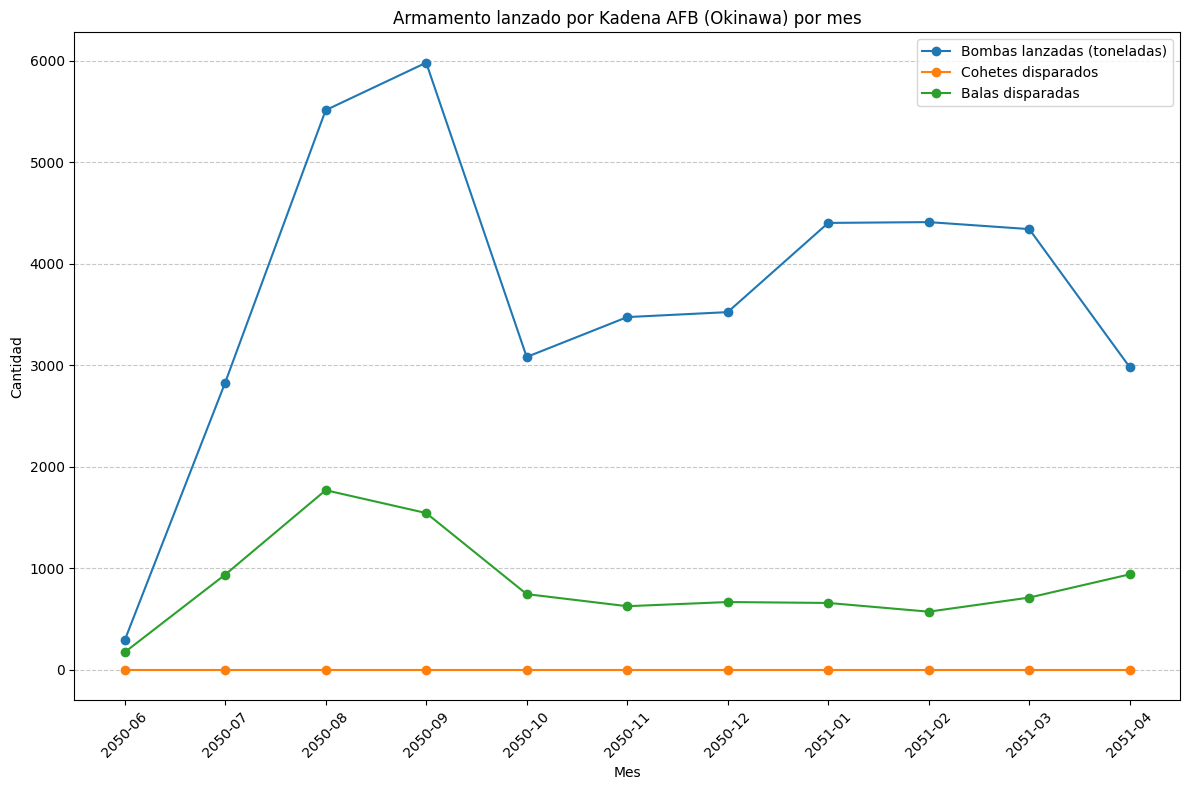

In [23]:
# Agrupar por país, base y mes, y sumar las cantidades de bombas, cohetes y balas lanzadas
df_bombardeos_2['MSN_DATE'] = pd.to_datetime(df_bombardeos_2['MSN_DATE'], format='%m/%d/%y')
df_bombardeos_2['month'] = df_bombardeos_2['MSN_DATE'].dt.to_period('M')

armamento_por_mes = df_bombardeos_2.groupby(['LAUNCH_COUNTRY', 'LAUNCH_BASE', 'month']).agg(
    total_bombas=('TOTAL_TONS', 'sum'),
    total_cohetes=('ROCKETS', 'sum'),
    total_balas=('BULLETS', 'sum')
).reset_index()

# Filtrar los datos para un país y base específicos (por ejemplo, Okinawa y Kadena AFB)
pais = 'Okinawa'
base = 'Kadena AFB'
datos_filtrados = armamento_por_mes[(armamento_por_mes['LAUNCH_COUNTRY'] == pais) & (armamento_por_mes['LAUNCH_BASE'] == base)]

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Gráfica de bombas lanzadas
plt.plot(datos_filtrados['month'].astype(str), datos_filtrados['total_bombas'], label='Bombas lanzadas (toneladas)', marker='o')

# Gráfica de cohetes disparados
plt.plot(datos_filtrados['month'].astype(str), datos_filtrados['total_cohetes'], label='Cohetes disparados', marker='o')

# Gráfica de balas disparadas
plt.plot(datos_filtrados['month'].astype(str), datos_filtrados['total_balas'], label='Balas disparadas', marker='o')

# Añadir títulos y etiquetas
plt.title(f'Armamento lanzado por {base} ({pais}) por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout();

In [24]:
# Calcular totales y promedios
total_bombas = datos_filtrados['total_bombas'].sum()
total_cohetes = datos_filtrados['total_cohetes'].sum()
total_balas = datos_filtrados['total_balas'].sum()

promedio_bombas = datos_filtrados['total_bombas'].mean()
promedio_cohetes = datos_filtrados['total_cohetes'].mean()
promedio_balas = datos_filtrados['total_balas'].mean()

# Imprimir estadísticas
print(f"Estadísticas de armamento lanzado por {base} ({pais}):")
print(f"Total de bombas lanzadas (en toneladas): {total_bombas}")
print(f"Total de cohetes disparados: {total_cohetes}")
print(f"Total de balas disparadas: {total_balas}")
print(f"Promedio de bombas lanzadas por mes (en toneladas): {promedio_bombas}")
print(f"Promedio de cohetes disparados por mes: {promedio_cohetes}")
print(f"Promedio de balas disparadas por mes: {promedio_balas}")

Estadísticas de armamento lanzado por Kadena AFB (Okinawa):
Total de bombas lanzadas (en toneladas): 40832.0
Total de cohetes disparados: 0.0
Total de balas disparadas: 9341.0
Promedio de bombas lanzadas por mes (en toneladas): 3712.0
Promedio de cohetes disparados por mes: 0.0
Promedio de balas disparadas por mes: 849.1818181818181


In [21]:
# Convertir MSN_DATE a formato de fecha
df_bombardeos_2['MSN_DATE'] = pd.to_datetime(df_bombardeos_2['MSN_DATE'], format='%m/%d/%y')

# Agrupar por año y mes y contar el número de misiones
misiones_por_mes = df_bombardeos_2.groupby(df_bombardeos_2['MSN_DATE'].dt.to_period('M')).size().reset_index(name='counts')

misiones_por_mes

,MSN_DATE,counts
0,2050-06,109
1,2050-07,656
2,2050-08,1070
3,2050-09,1281
4,2050-10,1287
5,2050-11,1366
6,2050-12,1575
7,2051-01,1711
8,2051-02,1584
9,2051-03,1162


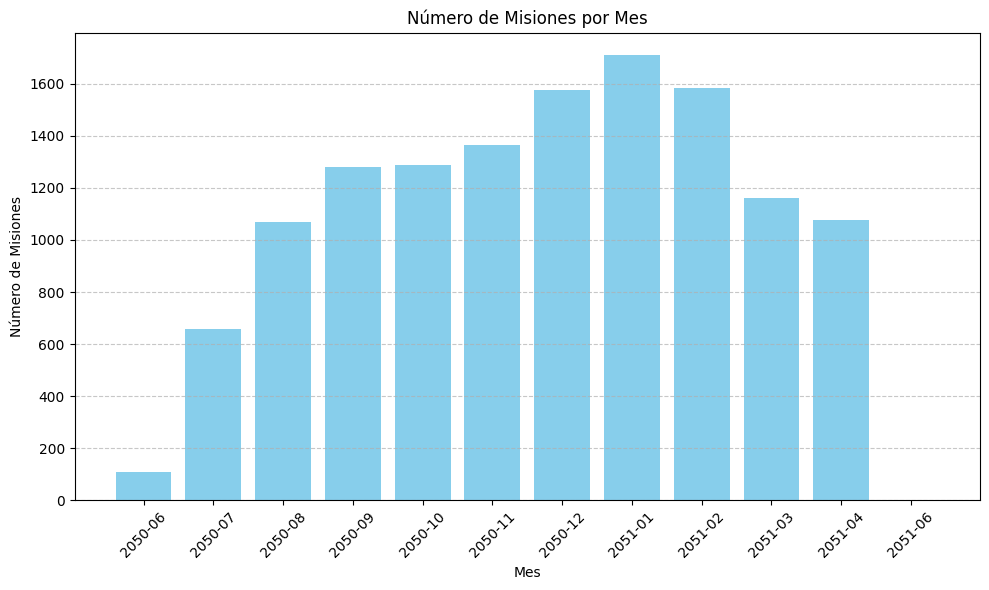

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(misiones_por_mes['MSN_DATE'].astype(str), misiones_por_mes['counts'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Número de Misiones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Misiones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout();

In [26]:
frecuencia_ac_type = df_bombardeos_2['AC_TYPE'].value_counts()
print("Frecuencia de tipos de aeronaves:")
print(frecuencia_ac_type)

Frecuencia de tipos de aeronaves:
AC_TYPE
B29     1724
F51     1615
F80     1537
C47     1128
B26      985
C54      772
C119     676
C46      660
T06      479
RB29     353
C45      303
F82      281
RF80     280
F84      271
RB26     231
WB29     199
L05      190
VC47     147
H05      139
SA16     117
F86      116
RF51     111
SB17     108
SB29     103
VB17      85
RC45      77
RB45      67
RB17      49
T33       36
T07       26
B25        1
G29        1
LO5        1
G26        1
RB44       1
O54        1
R829       1
RB25       1
RL29       1
TO6        1
TQ6        1
WS29       1
Name: count, dtype: int64


In [27]:
# Agrupar por país, base y tipo de aeronave, y calcular las sumas y promedios de las estadísticas
estadisticas_aeronaves = df_bombardeos_2.groupby(['LAUNCH_COUNTRY', 'LAUNCH_BASE', 'AC_TYPE']).agg(
    total_ac_dispatched=('AC_DISPATCHED', 'sum'),
    total_ac_effective=('AC_EFFECTIVE', 'sum'),
    total_ac_abort=('AC_ABORT', 'sum'),
    total_ac_lost_eac=('AC_LOST_TO_EAC', 'sum'),
    total_ac_lost_aaa=('AC_LOST_TO_AAA', 'sum'),
    total_ac_lost_other=('AC_LOST_TO_OTHER', 'sum'),
    total_ac_damaged=('AC_DAMAGED', 'sum'),
    total_kia=('KIA', 'sum'),
    total_wia=('WIA', 'sum'),
    total_mia=('MIA', 'sum'),
    total_bombas=('TOTAL_TONS', 'sum'),
    total_cohetes=('ROCKETS', 'sum'),
    total_balas=('BULLETS', 'sum')
).reset_index()

# Rellenar NaN con 0 para evitar problemas en las sumas
estadisticas_aeronaves = estadisticas_aeronaves.fillna(0)

# Mostrar las estadísticas
estadisticas_aeronaves

,LAUNCH_COUNTRY,LAUNCH_BASE,AC_TYPE,total_ac_dispatched,total_ac_effective,total_ac_abort,total_ac_lost_eac,total_ac_lost_aaa,total_ac_lost_other,total_ac_damaged,total_kia,total_wia,total_mia,total_bombas,total_cohetes,total_balas
0,Japan,Yokota AFB,B29,2980.0,2878.0,101.0,0.0,0.0,4.0,19.0,6.0,4.0,21.0,24420.0,0.0,3426.0
1,Japan,Yokota AFB,F82,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Japan,Yokota AFB,R829,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,Japan,Yokota AFB,RB29,321.0,304.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,370.0
4,Japan,Yokota AFB,RB44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Japan,Yokota AFB,RB45,73.0,68.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Japan,Yokota AFB,RC45,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Japan,Yokota AFB,RF80,41.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Japan,Yokota AFB,RL29,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,Japan,Yokota AFB,SB29,86.0,81.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


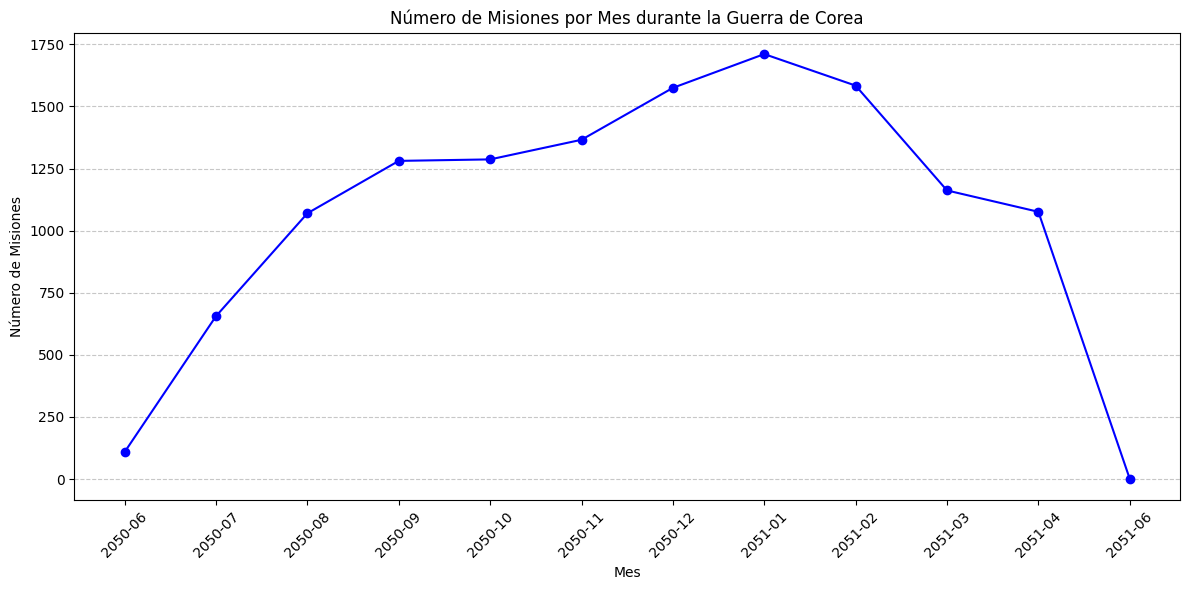

In [28]:
# Agrupar las misiones por año y mes y contar el número de misiones
misiones_por_mes = df_bombardeos_2.groupby(df_bombardeos_2['MSN_DATE'].dt.to_period('M')).size().reset_index(name='counts')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(misiones_por_mes['MSN_DATE'].astype(str), misiones_por_mes['counts'], marker='o', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Número de Misiones por Mes durante la Guerra de Corea')
plt.xlabel('Mes')
plt.ylabel('Número de Misiones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [29]:
# Calcular la eficiencia por base de lanzamiento
df_bombardeos_2['efficiency'] = df_bombardeos_2['AC_EFFECTIVE'] / df_bombardeos_2['AC_DISPATCHED']

# Agrupar por base de lanzamiento y calcular la eficiencia promedio
eficiencia_base = df_bombardeos_2.groupby('LAUNCH_BASE')['efficiency'].mean().reset_index()
eficiencia_base = eficiencia_base.sort_values(by='efficiency', ascending=False)

print("Eficiencia por base de lanzamiento:")
print(eficiencia_base)

# Agrupar por país de lanzamiento y calcular la eficiencia promedio
eficiencia_pais = df_bombardeos_2.groupby('LAUNCH_COUNTRY')['efficiency'].mean().reset_index()
eficiencia_pais = eficiencia_pais.sort_values(by='efficiency', ascending=False)

print("\nEficiencia por país de lanzamiento:")
print(eficiencia_pais)

# Agrupar por mes y calcular la eficiencia promedio
eficiencia_mes = df_bombardeos_2.groupby('month')['efficiency'].mean().reset_index()
eficiencia_mes = eficiencia_mes.sort_values(by='efficiency', ascending=False)

print("\nEficiencia por mes:")
print(eficiencia_mes)

Eficiencia por base de lanzamiento:
  LAUNCH_BASE  efficiency
0   Clark AFB    0.987805
1  Kadena AFB    0.978220
2  Yokota AFB    0.973569

Eficiencia por país de lanzamiento:
  LAUNCH_COUNTRY  efficiency
2    Philippines    0.987805
1        Okinawa    0.978220
0          Japan    0.973569

Eficiencia por mes:
      month  efficiency
11  2051-06    1.000000
10  2051-04    0.981588
2   2050-08    0.981505
3   2050-09    0.979483
6   2050-12    0.978927
5   2050-11    0.977683
9   2051-03    0.976257
7   2051-01    0.975993
8   2051-02    0.974949
4   2050-10    0.971897
1   2050-07    0.953413
0   2050-06    0.936102


## 📊 Interpretación de los Resultados

### 1. ¿Qué es la eficiencia y cómo se calcula? 🤔
La eficiencia se calcula como:
```python


### Fórmula de cálculo

efficiency = AC_EFFECTIVE / AC_DISPATCHED
```
- **AC_EFFECTIVE**: ✈️ Número de aeronaves que cumplieron efectivamente la misión.
- **AC_DISPATCHED**: 🚀 Número total de aeronaves enviadas.



#### Medida:
La eficiencia mide la proporción de aeronaves que completaron sus misiones de manera exitosa. Una eficiencia cercana a 1 (o 100%) indica que casi todas las aeronaves enviadas cumplieron su objetivo.

---

### 2. Resultados 📈

#### **Eficiencia por base de lanzamiento:**
| 🛫 Base de Lanzamiento | 📊 Eficiencia Promedio |
|----------------------|---------------------|
| Clark AFB           | 0.987805           |
| Kadena AFB          | 0.978220           |
| Yokota AFB          | 0.973569           |

**Conclusión:**
- La base **Clark AFB** (en Filipinas) tuvo la mayor eficiencia, con más del 98.7% de las aeronaves cumpliendo sus misiones. 🌟
- Las bases en Okinawa y Japón también tuvieron altos niveles de eficiencia (por encima del 97%). ✅

#### **Eficiencia por país de lanzamiento:**
| 🌍 País de Lanzamiento | 📊 Eficiencia Promedio |
|---------------------|---------------------|
| Philippines         | 0.987805           |
| Okinawa             | 0.978220           |
| Japan               | 0.973569           |

**Conclusión:**
- El país con mayor eficiencia fue **Filipinas**, gracias a las operaciones en la base Clark AFB. 🏆
- **Okinawa** y **Japón** muestran eficiencias similares y consistentemente altas, reflejando operaciones bien organizadas. 🛠️

#### **Eficiencia por mes:**
| 🗓️ Mes (Año-Mes) | 📊 Eficiencia Promedio |
|---------------|---------------------|
| 2051-06       | 1.000000           |
| 2051-04       | 0.981588           |
| 2050-08       | 0.981505           |
| 2050-09       | 0.979483           |
| 2050-12       | 0.978927           |
| 2050-06       | 0.936102           |

**Conclusión:**
- **Junio de 2051** tuvo una eficiencia perfecta (100%), lo que sugiere operaciones altamente exitosas o perfectamente ejecutadas. 🥇
- La eficiencia más baja fue en **junio de 2050** (93.6%), lo que podría indicar condiciones adversas o problemas en las operaciones de ese mes. ⚠️

---

### 3. Valores nulos ❓

#### ¿Hay muchos valores nulos? 🧐
Si hay valores nulos en las columnas **AC_DISPATCHED** o **AC_EFFECTIVE**, no se puede calcular la eficiencia para esas misiones, y se generan valores nulos (`NaN`) en la columna `efficiency`.

#### Posibles causas de valores nulos:
- **Falta de registros históricos:** 📜 No se documentaron todas las misiones completamente.
- **Misiones abortadas o no planificadas:** ❌ Algunas misiones pudieron haberse cancelado antes de su ejecución.
- **Problemas en la recopilación de datos:** 🛠️ Falta de estandarización en el registro de operaciones.

---

### 4. Conclusiones generales 📝

#### **Eficiencia operativa:**
- Las bases de **Clark AFB (Filipinas)**, **Kadena AFB (Okinawa)** y **Yokota AFB (Japón)** demostraron ser altamente eficientes en general, con proporciones de aeronaves efectivas superiores al 97%. ✅

#### **Variaciones temporales:**
- **Junio de 2051** fue excepcionalmente eficiente (100%), posiblemente indicando una combinación de condiciones favorables y misiones bien planificadas. 🌟
- **Junio de 2050** fue el menos eficiente, posiblemente debido a factores externos o internos que afectaron las operaciones. ⚠️

#### **Impacto de los valores nulos:**
- Las misiones con datos faltantes no se incluyeron en el cálculo de eficiencia, lo que podría sesgar ligeramente los resultados hacia un promedio más alto si las misiones menos exitosas tienen más probabilidades de contener valores nulos.

---

### ¿Qué se puede hacer con los valores nulos? 🤔

#### **Rellenar valores faltantes:**
- Si **AC_DISPATCHED** es `NaN`, asumir que no hubo aeronaves enviadas y establecer el valor en `0`. 🛠️
- Si **AC_EFFECTIVE** es `NaN`, asumir que no hubo aeronaves exitosas y establecer el valor en `0`. 🛠️

#### **Eliminar registros incompletos:**
- Si hay demasiados valores nulos en una fila, considerar excluirla del análisis. 🗑️

#### **Investigar patrones en los valores nulos:**
- ¿Están concentrados en ciertas fechas, bases o países? Esto puede revelar problemas en la documentación o factores específicos que impactaron las misiones. 🔍

Matriz de correlación entre armamento y bajas:
            TOTAL_TONS   ROCKETS   BULLETS       KIA       WIA       MIA
TOTAL_TONS    1.000000  0.569999 -0.107789  0.319239  0.276527  0.561529
ROCKETS       0.569999  1.000000  0.606962  0.034404 -0.209862 -0.156104
BULLETS      -0.107789  0.606962  1.000000 -0.122379 -0.222030 -0.133925
KIA           0.319239  0.034404 -0.122379  1.000000  0.334856  0.909880
WIA           0.276527 -0.209862 -0.222030  0.334856  1.000000 -0.405720
MIA           0.561529 -0.156104 -0.133925  0.909880 -0.405720  1.000000


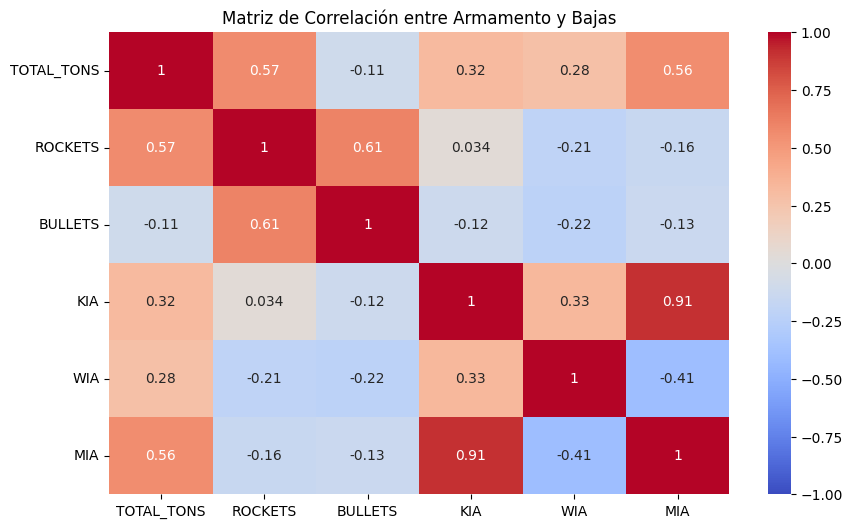

In [34]:
# Seleccionar las columnas relevantes para el análisis
columnas_interes = ['TOTAL_TONS', 'ROCKETS', 'BULLETS', 'KIA', 'WIA', 'MIA']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_armamento_bajas = df_bombardeos_2[columnas_interes]

# Calcular la matriz de correlación
matriz_correlacion = df_armamento_bajas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre armamento y bajas:")
print(matriz_correlacion)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Armamento y Bajas')
plt.show()

Tasas de daños y pérdidas por tipo de aeronave:
   AC_TYPE  damage_rate  loss_rate_eac  loss_rate_aaa
0      B25     0.000000       0.000000       0.000000
1      B26     0.003492       0.000000       0.000937
2      B29     0.005277       0.000859       0.000000
3     C119     0.000083       0.000000       0.000083
4      C45     0.000839       0.000000       0.000000
5      C46     0.001214       0.000000       0.000000
6      C47     0.001076       0.000000       0.000072
7      C54     0.000316       0.000190       0.000000
8      F51     0.004750       0.000059       0.002522
9      F80     0.004507       0.000186       0.000976
10     F82     0.009524       0.001905       0.001905
11     F84     0.001954       0.000109       0.000326
12     F86     0.000000       0.000412       0.000000
13     G26     0.000000       0.000000       0.000000
14     G29     0.000000       0.000000       0.000000
15     H05     0.000000       0.000000       0.001047
16     L05     0.002635       0.00

<Figure size 1400x800 with 0 Axes>

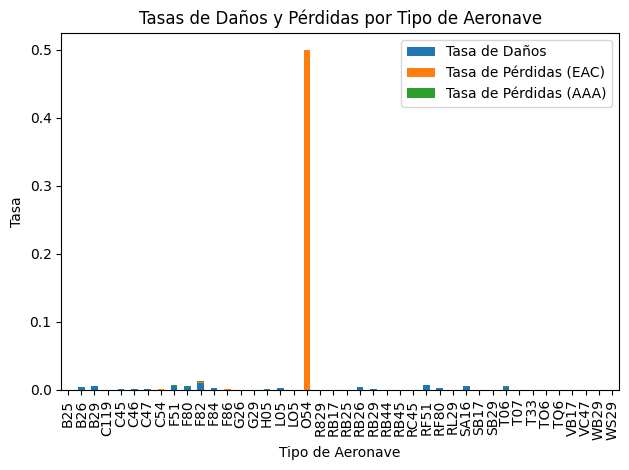

In [35]:
# Agrupar por tipo de aeronave y calcular las sumas de daños y pérdidas
daños_perdidas_por_tipo = df_bombardeos_2.groupby('AC_TYPE').agg(
    total_ac_damaged=('AC_DAMAGED', 'sum'),
    total_ac_lost_eac=('AC_LOST_TO_EAC', 'sum'),
    total_ac_lost_aaa=('AC_LOST_TO_AAA', 'sum'),
    total_ac_dispatched=('AC_DISPATCHED', 'sum')
).reset_index()

# Calcular las tasas de daños y pérdidas
daños_perdidas_por_tipo['damage_rate'] = daños_perdidas_por_tipo['total_ac_damaged'] / daños_perdidas_por_tipo['total_ac_dispatched']
daños_perdidas_por_tipo['loss_rate_eac'] = daños_perdidas_por_tipo['total_ac_lost_eac'] / daños_perdidas_por_tipo['total_ac_dispatched']
daños_perdidas_por_tipo['loss_rate_aaa'] = daños_perdidas_por_tipo['total_ac_lost_aaa'] / daños_perdidas_por_tipo['total_ac_dispatched']

# Rellenar NaN con 0 para evitar problemas en las tasas
daños_perdidas_por_tipo = daños_perdidas_por_tipo.fillna(0)

# Mostrar las estadísticas
print("Tasas de daños y pérdidas por tipo de aeronave:")
print(daños_perdidas_por_tipo[['AC_TYPE', 'damage_rate', 'loss_rate_eac', 'loss_rate_aaa']])

# Visualizar las tasas de daños y pérdidas usando un gráfico de barras
plt.figure(figsize=(14, 8))
daños_perdidas_por_tipo.set_index('AC_TYPE')[['damage_rate', 'loss_rate_eac', 'loss_rate_aaa']].plot(kind='bar', stacked=True)
plt.title('Tasas de Daños y Pérdidas por Tipo de Aeronave')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Tasa')
plt.legend(['Tasa de Daños', 'Tasa de Pérdidas (EAC)', 'Tasa de Pérdidas (AAA)'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Filtrar misiones con bajas o pérdidas significativas
misiones_con_bajas_perdidas = df_bombardeos_2[
    (df_bombardeos_2['KIA'].notna()) | 
    (df_bombardeos_2['WIA'].notna()) | 
    (df_bombardeos_2['MIA'].notna()) | 
    (df_bombardeos_2['AC_LOST_TO_EAC'].notna()) | 
    (df_bombardeos_2['AC_LOST_TO_AAA'].notna()) | 
    (df_bombardeos_2['AC_LOST_TO_OTHER'].notna())
]

# Agrupar por base y país y contar el número de misiones con bajas o pérdidas
impacto_base = misiones_con_bajas_perdidas.groupby('LAUNCH_BASE').size().reset_index(name='misiones_con_impacto')
impacto_pais = misiones_con_bajas_perdidas.groupby('LAUNCH_COUNTRY').size().reset_index(name='misiones_con_impacto')

# Contar el número total de misiones por base y país
total_misiones_base = df_bombardeos_2.groupby('LAUNCH_BASE').size().reset_index(name='total_misiones')
total_misiones_pais = df_bombardeos_2.groupby('LAUNCH_COUNTRY').size().reset_index(name='total_misiones')

# Calcular el porcentaje de misiones con bajas o pérdidas significativas
impacto_base = impacto_base.merge(total_misiones_base, on='LAUNCH_BASE')
impacto_base['porcentaje_impacto'] = (impacto_base['misiones_con_impacto'] / impacto_base['total_misiones']) * 100

impacto_pais = impacto_pais.merge(total_misiones_pais, on='LAUNCH_COUNTRY')
impacto_pais['porcentaje_impacto'] = (impacto_pais['misiones_con_impacto'] / impacto_pais['total_misiones']) * 100

# Mostrar los resultados
print("Impacto por base:")
print(impacto_base[['LAUNCH_BASE', 'porcentaje_impacto']])

print("\nImpacto por país:")
print(impacto_pais[['LAUNCH_COUNTRY', 'porcentaje_impacto']])

Impacto por base:
  LAUNCH_BASE  porcentaje_impacto
0  Kadena AFB            1.759015
1  Yokota AFB            0.877193

Impacto por país:
  LAUNCH_COUNTRY  porcentaje_impacto
0          Japan            0.877193
1        Okinawa            1.759015


Diferencias entre tipos de aeronaves:
   AC_TYPE  tasa_perdidas_eac  tasa_perdidas_aaa  promedio_kia  promedio_wia  \
0      B25                0.0              0.000      0.000000      0.000000   
1      B26                0.0              1.100      2.222222      1.200000   
2      B29                1.4              0.000      4.333333      2.882353   
3     C119                0.0              1.000      2.000000      1.000000   
4      C45                0.0              0.000      0.000000      0.000000   
5      C46                0.0              0.000      1.000000      2.000000   
6      C47                0.0              1.000      3.000000      2.000000   
7      C54                1.0              0.000      3.400000      2.000000   
8      F51                1.0              1.075      1.181818      1.000000   
9      F80                1.0              1.050      1.000000      1.000000   
10     F82                1.0              1.000      2.000000      1.000000   
11

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_39420\77833172.py:3: RuntimeWarning: invalid value encountered in scalar divide
  tasa_perdidas_eac=('AC_LOST_TO_EAC', lambda x: x.sum() / x.count()),
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_39420\77833172.py:4: RuntimeWarning: invalid value encountered in scalar divide
  tasa_perdidas_aaa=('AC_LOST_TO_AAA', lambda x: x.sum() / x.count()),


<Figure size 1400x800 with 0 Axes>

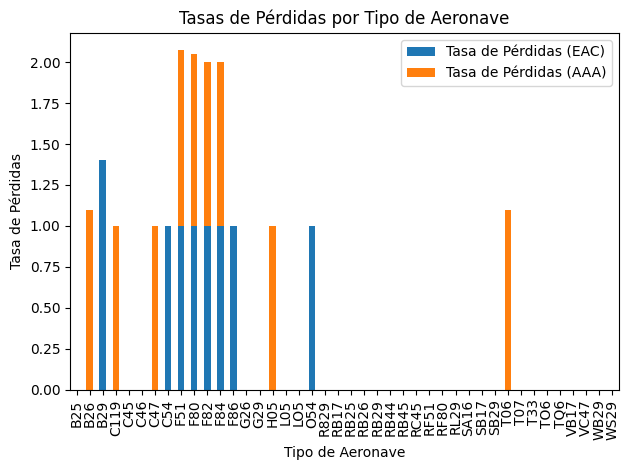

<Figure size 1400x800 with 0 Axes>

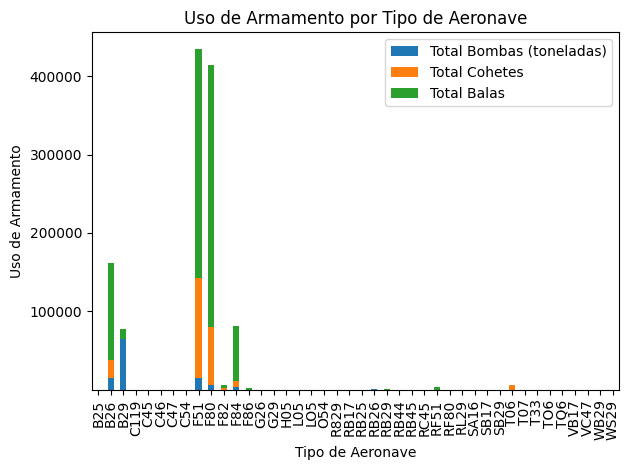

In [39]:
# Agrupar por tipo de aeronave y calcular las métricas clave
diferencias_aeronaves = df_bombardeos_2.groupby('AC_TYPE').agg(
    tasa_perdidas_eac=('AC_LOST_TO_EAC', lambda x: x.sum() / x.count()),
    tasa_perdidas_aaa=('AC_LOST_TO_AAA', lambda x: x.sum() / x.count()),
    promedio_kia=('KIA', 'mean'),
    promedio_wia=('WIA', 'mean'),
    promedio_mia=('MIA', 'mean'),
    uso_total_bombas=('TOTAL_TONS', 'sum'),
    uso_total_cohetes=('ROCKETS', 'sum'),
    uso_total_balas=('BULLETS', 'sum')
).reset_index()

# Rellenar NaN con 0 para evitar problemas en las tasas
diferencias_aeronaves = diferencias_aeronaves.fillna(0)

# Mostrar las estadísticas
print("Diferencias entre tipos de aeronaves:")
print(diferencias_aeronaves)

# Visualizar las tasas de pérdidas usando un gráfico de barras
plt.figure(figsize=(14, 8))
diferencias_aeronaves.set_index('AC_TYPE')[['tasa_perdidas_eac', 'tasa_perdidas_aaa']].plot(kind='bar', stacked=True)
plt.title('Tasas de Pérdidas por Tipo de Aeronave')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Tasa de Pérdidas')
plt.legend(['Tasa de Pérdidas (EAC)', 'Tasa de Pérdidas (AAA)'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualizar el uso de armamento usando un gráfico de barras
plt.figure(figsize=(14, 8))
diferencias_aeronaves.set_index('AC_TYPE')[['uso_total_bombas', 'uso_total_cohetes', 'uso_total_balas']].plot(kind='bar', stacked=True)
plt.title('Uso de Armamento por Tipo de Aeronave')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Uso de Armamento')
plt.legend(['Total Bombas (toneladas)', 'Total Cohetes', 'Total Balas'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
# Calcular el rango de fechas para cada base
rango_fechas_base = df_bombardeos_2.groupby('LAUNCH_BASE')['MSN_DATE'].agg(['min', 'max']).reset_index()
rango_fechas_base.columns = ['LAUNCH_BASE', 'Fecha_Inicio', 'Fecha_Fin']
rango_fechas_base['Duracion'] = (rango_fechas_base['Fecha_Fin'] - rango_fechas_base['Fecha_Inicio']).dt.days

# Calcular el rango de fechas para cada país
rango_fechas_pais = df_bombardeos_2.groupby('LAUNCH_COUNTRY')['MSN_DATE'].agg(['min', 'max']).reset_index()
rango_fechas_pais.columns = ['LAUNCH_COUNTRY', 'Fecha_Inicio', 'Fecha_Fin']
rango_fechas_pais['Duracion'] = (rango_fechas_pais['Fecha_Fin'] - rango_fechas_pais['Fecha_Inicio']).dt.days

# Evaluar interrupciones o períodos de inactividad
def calcular_interrupciones(df, grupo):
    df_sorted = df.sort_values(by=['MSN_DATE'])
    df_sorted['Diferencia'] = df_sorted['MSN_DATE'].diff().dt.days
    interrupciones = df_sorted[df_sorted['Diferencia'] > 30].groupby(grupo).size().reset_index(name='Interrupciones')
    return interrupciones

interrupciones_base = calcular_interrupciones(df_bombardeos_2, 'LAUNCH_BASE')
interrupciones_pais = calcular_interrupciones(df_bombardeos_2, 'LAUNCH_COUNTRY')

# Unir los datos de rango de fechas con las interrupciones
rango_fechas_base = rango_fechas_base.merge(interrupciones_base, on='LAUNCH_BASE', how='left').fillna(0)
rango_fechas_pais = rango_fechas_pais.merge(interrupciones_pais, on='LAUNCH_COUNTRY', how='left').fillna(0)

# Mostrar los resultados
print("Rango de fechas y consistencia de operaciones por base:")
print(rango_fechas_base)

print("\nRango de fechas y consistencia de operaciones por país:")
print(rango_fechas_pais)

Rango de fechas y consistencia de operaciones por base:
  LAUNCH_BASE Fecha_Inicio  Fecha_Fin  Duracion  Interrupciones
0   Clark AFB   2050-08-28 2050-11-23        87             0.0
1  Kadena AFB   2050-06-28 2051-04-30       306             0.0
2  Yokota AFB   2050-06-26 2051-04-30       308             0.0

Rango de fechas y consistencia de operaciones por país:
  LAUNCH_COUNTRY Fecha_Inicio  Fecha_Fin  Duracion  Interrupciones
0          Japan   2050-06-26 2051-04-30       308             0.0
1        Okinawa   2050-06-28 2051-04-30       306             0.0
2    Philippines   2050-08-28 2050-11-23        87             0.0


In [42]:
# Calcular la efectividad neta
df_bombardeos_2['efectividad_neta'] = (df_bombardeos_2['AC_EFFECTIVE'] - df_bombardeos_2['AC_ABORT']) / df_bombardeos_2['AC_DISPATCHED']

# Calcular el costo humano por misión
df_bombardeos_2['costo_humano'] = (df_bombardeos_2['KIA'] + df_bombardeos_2['WIA'] + df_bombardeos_2['MIA']) / df_bombardeos_2['AC_DISPATCHED']

# Agrupar por base de lanzamiento y calcular las métricas promedio
metricas_base = df_bombardeos_2.groupby('LAUNCH_BASE').agg(
    efectividad_neta_promedio=('efectividad_neta', 'mean'),
    costo_humano_promedio=('costo_humano', 'mean')
).reset_index()

# Mostrar las métricas combinadas por base
print("Métricas combinadas por base:")
print(metricas_base)

Métricas combinadas por base:
  LAUNCH_BASE  efectividad_neta_promedio  costo_humano_promedio
0   Clark AFB                   0.000000                    NaN
1  Kadena AFB                   0.547587               2.083333
2  Yokota AFB                   0.537428                    NaN
